<a href="https://colab.research.google.com/github/MattiaPerrone123/Life_Expectancy_Prediction/blob/main/Life_Expectancy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting Life Expectancy with linear regression

The current projects is about the application of linear regression (Vanilla, Ridge, Lasso) and ensemble methods (Bagging, Random Forest, XGBoost) to predict the life expectancy of a country given its main health indexes


#Importing the dataset and libraries

The following libraries, with the respective versions, have been used for this projects:
- numpy==1.21.6
- pandas==1.3.5
- matplotlib==3.2.2
- seaborn==0.11.2
- scikit-learn==1.0.2
- xgboost==0.90

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import xgboost
%matplotlib inline 

import pickle

from collections import Counter

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_predict 
from sklearn.utils import resample                                                                                              
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline

import random

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


Let's load the dataset and save it in the variable data. We will also save a copy of the original dataset (as data_original). This will be used at the end of the project to show the importance of Exploratory Data Analysis 

In [3]:
data = pd.read_csv("Life_Expectancy_Data.csv")
data_original=data.copy()

#1) Exploratory data analysis




## 1.1) Initial considerations

As for all machine learning problems, Exploratory Data Analysis (EDA) is essential to gain confidence with the dataset, to understand eventual patterns in the data and to perform data cleaning, if necessary.

From a quick glance, we can see the dataset features, with Life Expectancy being the output variable, and the main statistic coefficients for each variable in the dataset

We observe that the number of observations (2938) and the number of features (22) are not particularly high

In [4]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
#@title
print("The number of observations for this dataset is " + str(data.shape[0])+", \
while the number of features is " + str(data.shape[1]))

The number of observations for this dataset is 2938, while the number of features is 22


In [6]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


By looking at the table above, we can see that some values do not actually make a lot of sense. In particular:

*   Percentage expenditure: the maximum value is almost 20.000, even though this is supposed to be a percentage
*   Infant Deaths and Under Five Deaths: the maximum value is almost 2,000 for both of them, even though this is supposed to 1,000. Moreover, these two features seem to provide very similar information
*   Population: here the standard deviation is over 60 millions, which is something that does not make sense at all

A detailed description of the feature dataset is provided in the dataset_description.txt file










To better visualize these patterns,
let's plot the scatter plot of these features over the number of occurencies 

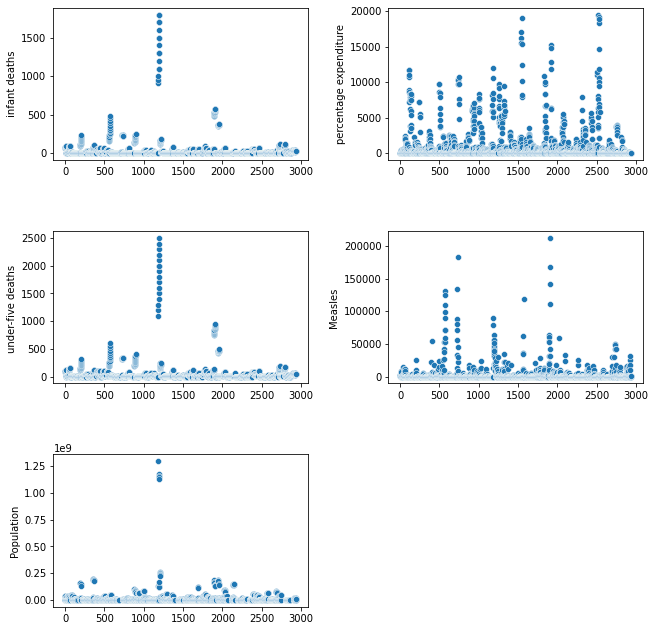

In [7]:
#@title
fig, axis = plt.subplots(3, 2, figsize=(10, 10))
fig.delaxes(axis[2,1]) 
fig.tight_layout(pad=5.0)

x_vector = list(range(0, len(data)))

sns.scatterplot(data=data, x=x_vector, y="infant deaths", ax=axis[0,0])
sns.scatterplot(data=data, x=x_vector, y="percentage expenditure", ax=axis[0,1])
sns.scatterplot(data=data, x=x_vector, y="under-five deaths ", ax=axis[1,0])
sns.scatterplot(data=data, x=x_vector, y="Measles ", ax=axis[1,1])
sns.scatterplot(data=data, x=x_vector, y="Population", ax=axis[2,0])

An important thing to consider when working with a dataset like the current one, is that features are not expected to change a lot during the years (just 15 years are considered here) for a specific country.

Therefore, there are clearly some data issues that need to be addressed, as we can see from some features in the table below (such as percentage expenditure, population, GDP), where values may vary of more than one order of magnitude from one year to the next one for the same country.




In [8]:
#@title
data.head(10) 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


Moreover, we can see that some features have a high number of missing values (recalling that the number of observation is 2938)

In [9]:
#@title
NaN_values=pd.DataFrame(data.isnull().sum().sort_values(ascending=False)).rename(columns = {0:'NaN'})
NaN_values

,NaN
Population,652
Hepatitis B,553
GDP,448
Total expenditure,226
Alcohol,194
Income composition of resources,167
Schooling,163
thinness 5-9 years,34
thinness 1-19 years,34
BMI,34


Therefore, some data cleaning and missing values handling is required

##1.2) Data cleaning and Missing values handling

When dealing with dirty data, there are basically three possible options: discarding the observations, discarding the features and celaning the data. Here the third option has been chosen, because of the low number of observations (2938) and attributes (22).

The following script provides a visualization of the life expectancy (output variable) against the other variables in the dataset by country. Each time the script is run, the life expectancy of 4 random countries is plotted against a random numerical variable for those 4 countries during 16 years (2000-2015)

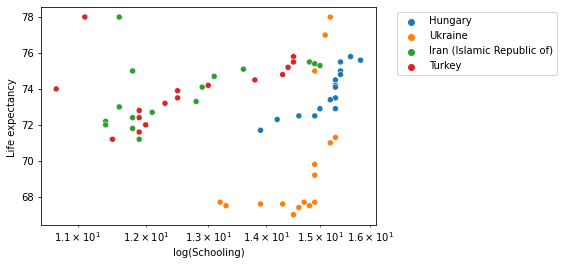

In [10]:
#@title
def random_countries(data):
  vector_dataset=[pd.DataFrame()]
  data_graph=pd.DataFrame()
  for i in range(5):
    rand_number=random.randint(0,len(data.Country))
    rand_country=data.iloc[rand_number, :]["Country"]
    vector_dataset.append(data[[data["Country"]==rand_country][0]])
    data_graph=pd.concat([data_graph, vector_dataset[i]])
  return data_graph

data_graph=random_countries(data)


def scatter_feature(data):
  x_value=np.random.choice(data.columns[4:])
  sns.scatterplot(data=data, 
                x=x_value, y="Life expectancy ", hue="Country")
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.xscale('log')
  plt.xlabel("log(" + str(x_value)+")")
scatter_feature(data_graph)

By observing the graph above, we can say that:
* Considering one of the 4 countries, it may happen that some values are off by one or more order of magnitudes with respect to the other values of that specific country. That is not expected since features referred to the same country are not supposed to change drastically values, as mentioned before. This issue happens in particular with some specific features (such as Population, Diphteria...). For these specific features, it seems that values are always off by a factor of 10\*k, where k ranges typically between -2 and +2. 
This means that dividing these values by a factor of 10*k would solve the problem. Plotting the x-axis in log scale was of great help to find this pattern.


* If some of the values for a specific country are not displayed in the graph, this means that they are either NaN, or they are beyond the x-axis limit.

Below, an example with the feature "Population" is provided, to explain better what it is meant





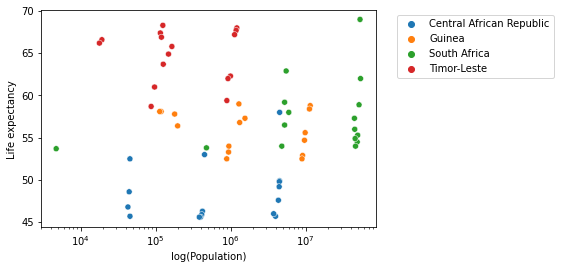

In [11]:
#@title
data_graph=random_countries(data)

def scatter_feature_population(data):
  x_value=np.random.choice(data.columns[4:])
  sns.scatterplot(data=data, 
                x="Population", y="Life expectancy ", hue="Country")
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.xscale('log')
  plt.xlabel("log(Population)")
scatter_feature_population(data_graph)

To better stress this point about different order of magnitudes, the table below shows the order of magnitudes of the dataset elements by feature. For example, considering the feature "Life expectancy", all the observations are under the column "1.0", meaning that all the values of life expectancy in the dataset range from 10 to 99 (1\*10^1 - 9.9\*10^1)

Again, we can observe that some values do not make a lot of sense, such as the ones of percentage expenditure and population

In [12]:
#@title
def orderOfMagnitude(number):
    return np.floor(np.log10(number))

def dataset_magnitude(data):
  array_dict=[]
  for i in data.columns[3:]:
    value=orderOfMagnitude(np.array(data[i]))
    Count=Counter(value[~np.isnan(value)])
    array_dict.append(Count)

  dataframe_count=pd.DataFrame(index=data.columns[3:])

  for ind,i in enumerate(array_dict):
    dataframe_count=pd.concat([dataframe_count, pd.DataFrame(i, 
                              index=[data.columns[ind+3]])])
  
  dataframe_count=dataframe_count.fillna(0).iloc[int(dataframe_count.shape[0]/2):]
  return dataframe_count

dataset_count=dataset_magnitude(data)
dataset_count.iloc[:,3:6]

,0.0,1.0,2.0
Life expectancy,0.0,2928.0,0.0
Adult Mortality,86.0,982.0,1860.0
infant deaths,1064.0,888.0,124.0
Alcohol,1659.0,373.0,0.0
percentage expenditure,226.0,776.0,890.0
Hepatitis B,159.0,2226.0,0.0
Measles,377.0,538.0,515.0
BMI,283.0,2621.0,0.0
under-five deaths,1025.0,899.0,213.0
Polio,172.0,2747.0,0.0


The following table shows the order of magnitude of the most frequent element for each features. For example, considering the feature "Life expectancy", since all the observations are under the column "1.0" of the previous table, all the elements of this feature will be in the interval 10-99

In [13]:
#@title
def dataset_min_max(dataframe_count):
  max_index=[]
  
  #I put [3:] to skip the first three elements of the table, which are nan,-2,-1
  empty_ = pd.DataFrame(index=dataframe_count.columns[3:])
  for i in range(dataframe_count.shape[0]):
    max_value=max(dataframe_count.iloc[i,3:])  
    max_index.append(list(dataframe_count.iloc[i,3:]).index(max_value))

  dataframe_magnitude = {'min': pd.Series(np.power([10], max_index), index=[data.columns[3:]]), 
                        'max': pd.Series(np.power([10], np.array(max_index)+1)-1, index=[data.columns[3:]])}

  return pd.DataFrame(data=dataframe_magnitude,  index=[data.columns[3:]])

data_min_max=dataset_min_max(dataset_count)
data_min_max

,min,max
Life expectancy,10,99
Adult Mortality,100,999
infant deaths,1,9
Alcohol,1,9
percentage expenditure,100,999
Hepatitis B,10,99
Measles,10,99
BMI,10,99
under-five deaths,1,9
Polio,10,99


The following functions address both this order of magnitude problem of and the NaN problem. In particular:
*   The function data_cleaning find the most common order of magnitude for the values given in input and multiplies/divides by powers of ten all the input values that are not in this interval so that they result in the end inside the interval
*   The function imputation performs the iterative inputation of the input data
*   The function main_preprocessing applies the two previous functions to the dataset used for this project. 
  *   The function data_cleaning has been applied for each feature by country. This means, for example, that for the feature "Adult mortality" the data were passed to the function data_cleaning by Country (so Afghanistan, Albania...). This ensures a more accurate outliers detection because values are not supposed to change a lot for the same countries. The mean value of a feature of a specific country is used to impute the missing values of that specific feature for that specific country (always because values are not supposed to change a lot for the same countries)
  *   The function iterative was applied at the end, when all the order of mangnitude issues were solved, and only if all the values of a specific feature of a specific country are NaN 





In [14]:
#@title
def data_cleaning(temp, low_value, up_value):
  value=orderOfMagnitude(np.array(temp))
  Count=Counter(value[~np.isnan(value)])
  if Count==Counter():
    return   
  
  #Find items in the most frequent order of magnitude
  most_freq=max(Count.items())[0] 

  #Mean of the items in the most frequent order of magnitude
  mean_value=np.mean(temp[orderOfMagnitude(temp)==most_freq])

  #Lower bound 
  sx_bound=low_value*mean_value

  #Upper bound  
  dx_bound=up_value*mean_value 

  #All the values lower than sx_bound are now in the correct oreder of magnitude
  ord_magn_lower=orderOfMagnitude(temp[temp<sx_bound]) 
  temp[temp<sx_bound]=np.power(10,most_freq-ord_magn_lower)*temp[temp<sx_bound]

  #All the values higher than dx_bound are now in the correct oreder of magnitude
  ord_magn_upper=orderOfMagnitude(temp[temp>dx_bound])
  temp[temp>dx_bound]=np.power(10,ord_magn_upper-most_freq)*temp[temp>dx_bound]


def imputation(data):
  data_new=data.copy()
  imp=IterativeImputer(random_state=15)
  data_new.iloc[:,3:]=imp.fit_transform(data.iloc[:,3:])
  return data_new


def main_preprocessing(data):

  #For loop considering only the numerical attributes
  for column in data.columns[3:]:

    #Mean of each column by Country   
    mean_col_by_count=data.groupby("Country").mean()[column]
    
    #For loop for the countries
    for index, current_country in enumerate(set(data["Country"])):
      
      #temp is an auxiliary variable
      temp=data[data["Country"]==current_country][column]
      
      #Inital and final indexes of a Country 
      ind_temp_init=temp.index[0]        
      ind_temp_fin=temp.index[-1]

      #If there is one value that is not a NaN for each element by Country 
      #do the following     
      if temp.isnull().all()==False:
          
        #Perform data cleaning
        data_cleaning(temp, 0.5, 5)

        #Filling NaN with the mean of value of each column by country
        temp.fillna(mean_col_by_count[index], inplace = True) 

        #Copying the values cleaned from temp to the actual dataset       
        data.loc[ind_temp_init:ind_temp_fin, column]=temp

  data=imputation(data) 

  return data
 
data=main_preprocessing(data)

The graphs below shows that the implemented functions has succeeded in data cleaning. However, there are still some outliers that are not correctly identified and cleaned. These outliers could be correctly identified by improving the function data_cleaning, changing the parameters sx_bound and dx_bound according to the different features. 

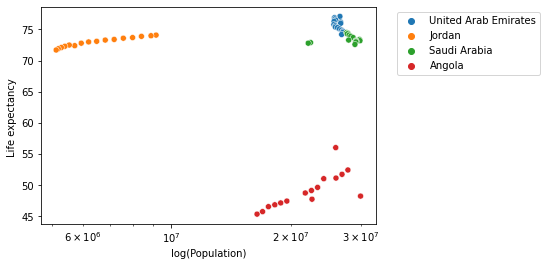

In [15]:
#@title
data_graph=random_countries(data)
scatter_feature_population(data_graph)

##1.3) Correlation between variables

The next step is calculating correlation coefficients both between the dataset features and the output variable and among the dataset features. 

The first approach is useful to understand which feature will be more important for the analysis, the second one is useful to understand if multicollinearity needs to be addressed. 

The correlation coefficients displayed below are Pearson correlation coefficients

In [16]:
#@title
def correlation_variables(data):
  #Move the feature life expectancy to the last column
  end=data.shape[1]
  col = data.pop("Life expectancy ")
  data.insert(end-1, col.name, col)

  #Find Correlation between variables
  data_num = data.select_dtypes(include = ['float64', 'int64'])
  data_num_corr = data_num.corr()['Life expectancy '][:-1] 
  top_features = data_num_corr[abs(data_num_corr) > 0.5].sort_values(ascending=False) #Pearson correlation coefficient 
  print("There are {} strongly correlated values with Life expectancy:\n{}".format(len(top_features), top_features))

  return data_num

data_num = correlation_variables(data)

There are 6 strongly correlated values with Life expectancy:
Income composition of resources    0.871283
 BMI                               0.714860
Schooling                          0.613373
Polio                              0.612445
Diphtheria                         0.610070
Adult Mortality                   -0.896480
Name: Life expectancy , dtype: float64


The following graphs highlight the relationships between each dataset feature and the output variable. We can observe that the feature Income composition of resources seems to have a linear relationship with the output variable, while there seems to be quadratic relationship between the features adult mortality and BMI with the output variable.

These three are also the three most strongly correlated features with the output variable in terms of absolute value.

A further improvement to the current project may be including polynomial features that takes into account the relationship just outlined



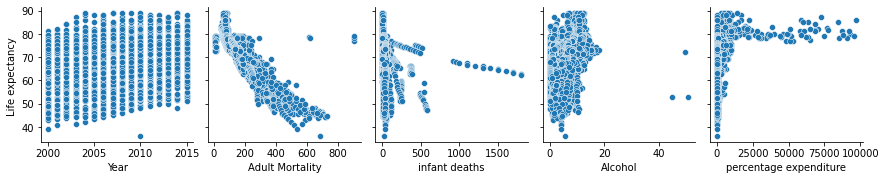

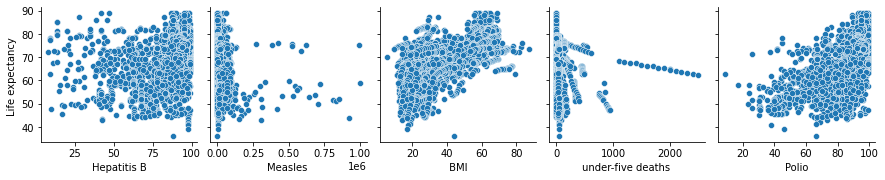

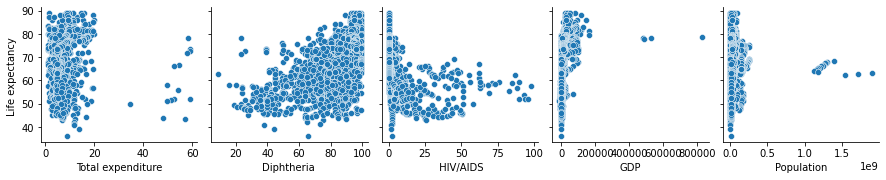

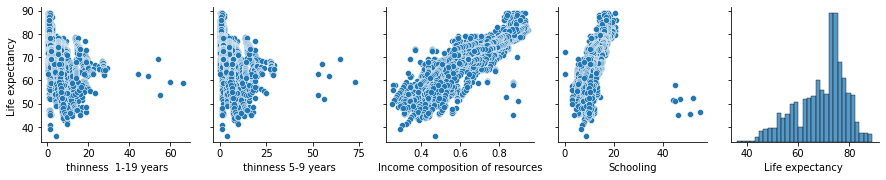

In [17]:
#@title
def pairplots(data_num):
  for i in range(0, len(data_num.columns), 5):
    sns.pairplot(data=data_num,
                x_vars=data_num.columns[i:i+5],
                y_vars=['Life expectancy '])

pairplots(data_num)    

From the correlation matrix below, we can spot some features that are highly correlated with each other (r>0.8).

These are:
* Population - under 5 deaths - infant deaths 
* Diphteria - Polio
* Thinness 1-19 years - Thinness 5-9 years


In the first case, the features under 5 deaths and infant deaths basically represent the same information. So one of these two features is randomly dropped (infant deaths). Comparing under 5 deaths with population, we observe that infant deaths has a higher correlation coefficient with Life expectancy. Therefore, also the feature population is discarded

In the second case, the strong correlation may be due to the fact that these two vaccines are generally administered together. Therefore one of this two features is randomly dropped (Diphteria is dropped)

Also in the third case, the two features provide the same information. Thinness 5-9 years is dropped in this case





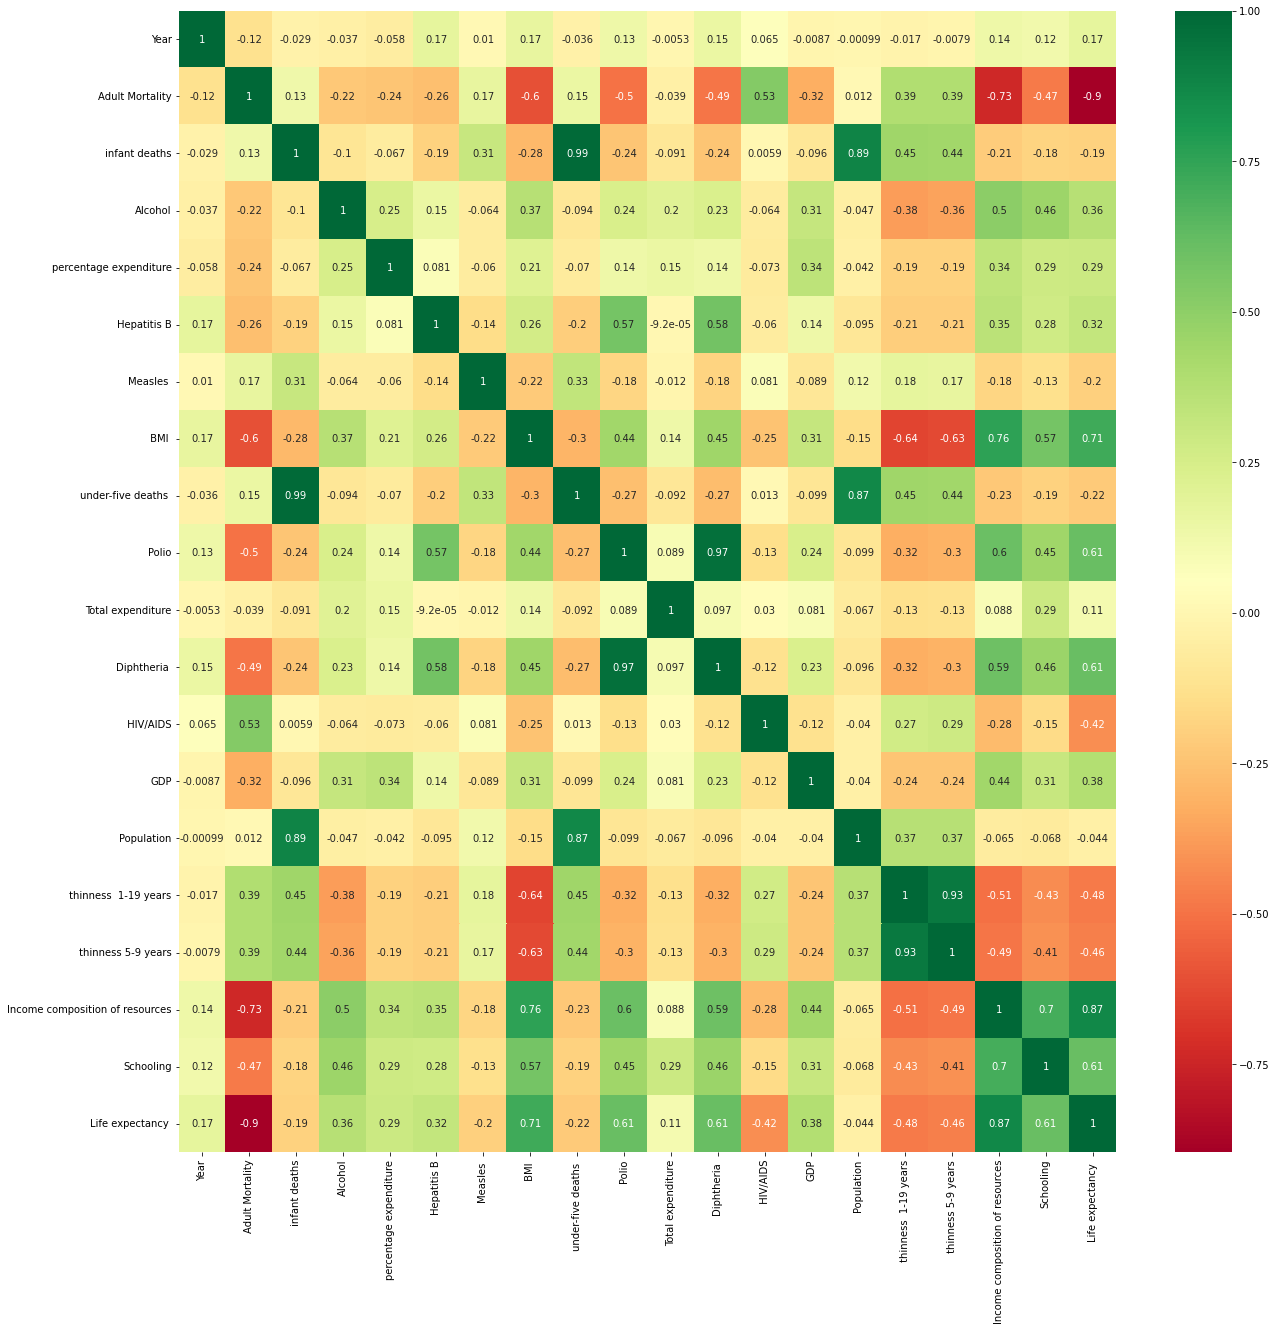

In [18]:
#@title
def correlation_matrix(data_num):
  plt.figure(figsize=(21,21))
  sns.heatmap(data_num.corr(),annot=True,cmap='RdYlGn')
  plt.show()
correlation_matrix(data_num)  

In [19]:
#@title
def drop_feature(data, features):
  for i in features:
    if i in data.columns:
      data.drop([i], axis="columns", inplace=True)

drop_feature(data, ['infant deaths', 'Diphtheria ', 
                    'Population', ' thinness 5-9 years'])

##1.4) Categorical variables conversion and Dataset splitting 

One hot encoding is performed for the conversion of categoricl variables. For the feature Country, one hot encoding is preferred to label encoding since countries are just ordered alphabetically, so there would be no point in giving higher values to the countries starting with a certain letter with respect to another. 

This leads to an increase of the feature dataset (from 18 to 209)

In [20]:
#@title
def one_hot_enc(data):
  #Select the categorical variables: object (string) columns
  mask = data.dtypes == object
  categorical_cols = data.columns[mask]

  #Performing one hot encoding of categorical variables
  one_hot_encode_cols=categorical_cols.tolist()
  data_new=pd.get_dummies(data, columns=one_hot_encode_cols, drop_first=True)
  
  if "Status_Developed" in data_new:
    data_new.drop(["Status_Developed"], axis="columns")
      
  return data_new

data_ohe=one_hot_enc(data)

The dataset is then split into train set (80% of the data) and test set (20% of the data). 10-fold cross-validation will be performed for every model for hyperparameter tuning. The data are scaled using the standard scaler (mean=0, variance=1)

In [21]:
#@title
def split_scal(data): 
  if "Life expectancy " in data.columns:
    x=data.drop(["Life expectancy "], axis="columns") 
    y=data["Life expectancy "]

  kf = KFold(shuffle=True, random_state=15, n_splits=10) 
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=15)

  s = StandardScaler()
  x_train_s = s.fit_transform(x_train)
  x_test_s = s.transform(x_test)

  return x, y, x_train, x_test, y_train, y_test, x_train_s, x_test_s, kf, s

x, y, x_train, x_test, y_train, y_test, x_train_s, x_test_s, kf, s = split_scal(data_ohe)

#2) Models

Two different set of models are proposed in this project. 

*   The first set is represented by linear regression models (Vanilla, Ridge, Lasso). Since these are simple models, some bias is expected.

*   The second set is represented by ensemble models (Bagging, Random Forest and XGBoost). Since these models are more complex than the previous ones, they are expected to reduce the bias showed by the linear regression models.

Hyperparameter tuning has been performed for every model (with the exeption of linear regression).

##2.1) Linear regression

###2.1.1) Vanilla linear regression

Vanilla linear regression is performed. Since this is a simple linear regression, no hyperparameter tuning is performed.

In [ ]:
#@title
def vanilla_linear_regression(x, y, x_train_s, x_test_s, y_train, y_test, kf, s):
  
  result=[]
  
  #linear regression
  vlr = LinearRegression()
  vlr.fit(x_train_s, y_train)
  y_pred_train_vlr = vlr.predict(x_train_s)
  y_pred_test_vlr = vlr.predict(x_test_s)
  y_pred_cv_vlr = cross_val_predict(vlr, x_train_s, y_train, cv=kf)

  #y_pred_test_vlr[86]=60
  
  result.append(r2_score(y_train, y_pred_train_vlr))
  result.append(r2_score(y_test, y_pred_test_vlr))
  result.append(r2_score(y_train, y_pred_cv_vlr))

  result.append(mean_squared_error(y_train, y_pred_train_vlr))
  result.append(mean_squared_error(y_test, y_pred_test_vlr))
  result.append(mean_squared_error(y_train, y_pred_cv_vlr))

  return result, y_pred_test_vlr, y_pred_cv_vlr, vlr

result_vlr, y_pred_test_vlr, y_pred_cv_vlr, vlr = vanilla_linear_regression(x, y, x_train_s, x_test_s, y_train, y_test, kf, s)

The model is now saved in the directory "Models". This step is particularly useful for models that take a lot of time to be trained, such as ensemble models. 

In [ ]:
#@title
#%cd /content
%cd Models
pickle.dump(vlr, open("Linear_regression_model", "wb")) 

/content/gdrive/MyDrive/Colab Notebooks/Life_Expectancy_Prediction_project/Models


In this way, models can be easily loaded by running the cell below (saving a lot of time), instead of being trained again.

In [ ]:
#@title
vlr=pickle.load(open("Linear_regression_model", "rb"))  

/content/gdrive/MyDrive/Colab Notebooks/Life_Expectancy_Prediction_project/Models


###2.1.2) Ridge regression

Ridge regression is performed. Alpha is the only hyperparameter considered for the hyperparameter tuning process. Then, the model is saved in the folder "Models"

In [ ]:
#@title
def ridge_regression(x, y, x_train_s, x_test_s, y_train, y_test, kf, s):
  
  result=[]
  estimator = Pipeline([("scaler", s),
                        ("ridge_regression", Ridge())])
  params = {
          'ridge_regression__alpha': np.geomspace(0.0001, 100, 7)
           }
  grid = GridSearchCV(estimator, params, scoring='neg_mean_squared_error', cv=kf)
  grid.fit(x, y)

  #Ridge regression
  rr = Ridge(alpha=grid.best_params_["ridge_regression__alpha"]) 
  estimator = Pipeline([("scaler", s),
        ("ridge_regression", Ridge(alpha=grid.best_params_["ridge_regression__alpha"]))])

  rr.fit(x_train_s, y_train)

  y_pred_train_rr = rr.predict(x_train_s)
  y_pred_test_rr = rr.predict(x_test_s)
  y_pred_cv_rr = cross_val_predict(rr, x_train_s, y_train, cv=kf)

  #y_pred_test_rr[86]=60
  
  result.append(r2_score(y_train, y_pred_train_rr))
  result.append(r2_score(y_test, y_pred_test_rr))
  result.append(r2_score(y_train, y_pred_cv_rr))

  result.append(mean_squared_error(y_train, y_pred_train_rr))
  result.append(mean_squared_error(y_test, y_pred_test_rr))
  result.append(mean_squared_error(y_train, y_pred_cv_rr))

  return result, y_pred_test_rr, y_pred_cv_rr, rr

result_rr, y_pred_test_rr, y_pred_cv_rr, rr = ridge_regression(x, y, x_train_s, x_test_s, y_train, y_test, kf, s)

In [ ]:
#@title
pickle.dump(rr, open("Ridge_regression_model", "wb")) 

In [ ]:
#@title
rr=pickle.load(open("Ridge_regression_model", "rb")) 

###2.1.3) Lasso regression

Lasso regression is performed. Alpha is the only hyperparameter considered for the hyperparameter tuning process. Then, the model is saved in the folder "Models"

In [ ]:
#@title
def lasso_regression(x, y, x_train_s, x_test_s, y_train, y_test, kf, s):
  
  result=[]
  estimator = Pipeline([("scaler", s),
                        ("lasso_regression", Lasso(max_iter=100000))])
  params = {
          'lasso_regression__alpha': np.geomspace(0.0001, 100, 7)
           }
  grid = GridSearchCV(estimator, params, scoring='neg_mean_squared_error', cv=kf)
  grid.fit(x_train_s, y_train)

  #Lasso regression
  lr = Lasso(alpha=grid.best_params_["lasso_regression__alpha"]) 
  estimator = Pipeline([("scaler", s),
        ("lasso_regression", Lasso(alpha=grid.best_params_["lasso_regression__alpha"]))])

  lr.fit(x_train_s, y_train)

  y_pred_train_lr = lr.predict(x_train_s)
  y_pred_test_lr = lr.predict(x_test_s)
  y_pred_cv_lr = cross_val_predict(lr, x_train_s, y_train, cv=kf)

  #y_pred_test_lr[86]=60
  
  result.append(r2_score(y_pred_train_lr, y_train))
  result.append(r2_score(y_pred_test_lr, y_test))
  result.append(r2_score(y_train, y_pred_cv_lr))

  result.append(mean_squared_error(y_pred_train_lr, y_train))
  result.append(mean_squared_error(y_pred_test_lr, y_test))
  result.append(mean_squared_error(y_pred_cv_lr, y_train))

  return result, y_pred_test_lr, y_pred_cv_lr, lr

result_lr, y_pred_test_lr, y_pred_cv_lr, lr = lasso_regression(x, y, x_train_s, x_test_s, y_train, y_test, kf, s)

In [ ]:
#@title
pickle.dump(lr, open("Lasso_regression_model", "wb")) 

In [ ]:
lr=pickle.load(open("Lasso_regression_model", "rb")) 

The two metrics used for model evaluation are r2 and the mean squared error. The hyperparameter tuning process is performed aiming at minimizing the mean squared error. This is true both for the linear regression and the ensemble models.


In [ ]:
#@title
def summary_results(result_1, result_2, result_3, y_test, y_pred_test_1, y_pred_test_2, y_pred_test_3):
  results_data=result_1, result_2, result_3
  dataframe=pd.DataFrame.transpose(pd.DataFrame(data=np.round(results_data,3), index=["Vanilla","Ridge","Lasso"], 
                                              columns=["R2  – training set","R2  – test set",
                                                       "R2  – 10-fold cv","MSE  – training set",
                                                       "MSE  – test set","MSE  – 10-fold cv"]))
  results_data=y_test, y_pred_test_1, y_pred_test_2, y_pred_test_3
  dataframe_le=pd.DataFrame.transpose(pd.DataFrame(data=np.round(results_data,1), 
                                                index=["y-test", "Vanilla","Ridge","Lasso"]))
  
  return dataframe, dataframe_le

dataframe_regression, dataframe_le_reg=summary_results(result_vlr, result_rr, result_lr, y_test, y_pred_test_vlr, y_pred_test_rr, y_pred_test_lr)                      

The table below summarizes the results obtained, dividing them by the metrics used (r2 and MSE). Overall, we can see that the results obtained from the three models are pretty similar, with Lasso regression is the one that performs slightly better

In [ ]:
#@title
dataframe_regression

,Vanilla,Ridge,Lasso
R2 – training set,0.966,0.965,0.965
R2 – test set,0.954,0.957,0.956
R2 – 10-fold cv,0.953,0.937,0.954
MSE – training set,3.032,3.121,3.068
MSE – test set,4.314,4.053,4.065
MSE – 10-fold cv,4.287,5.739,4.135


The table below compares the results obtained by the three models with the ground truth, considering the first 15 elements of the test set.

In [ ]:
#@title
dataframe_le_reg.head(15)

,y-test,Vanilla,Ridge,Lasso
0,77.1,77.4,77.2,77.3
1,77.3,78.7,78.7,78.7
2,73.5,73.4,73.4,73.4
3,73.0,73.1,72.9,73.0
4,78.3,79.5,79.5,79.5
5,74.5,74.7,74.9,74.9
6,69.6,70.6,70.7,70.7
7,73.9,73.5,73.9,73.7
8,78.7,78.3,78.3,78.3
9,71.9,72.3,72.2,72.2


##2.2) Ensemble models

This section aim at reducing the bias of the linear regression models, especially concerning the MSE.

Standard scaling has not been performed since we are dealing with ensemble models.

###2.2.1) Bagging

The first ensemble model implemented is bagging. 

A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. 

The two hyperparamters tuned were the number of estimators and the maximum number of features.

Then, the model is saved in the folder "Models".

In [31]:
#@title
def bagging_regression(x_train_s, x_test_s, y_train, y_test, kf, s):  
  result=[]

  param_grid = {'n_estimators': [n for n in range(50,131,10)],
                'max_features' : [n for n in range(30,81,10)]} 
  
  search = GridSearchCV(BaggingRegressor(), param_grid=param_grid,scoring='neg_mean_squared_error', cv=kf)
  search.fit(x_train_s, y_train)

  #Bagging regression
  bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                         n_estimators=search.best_params_["n_estimators"],
                         max_features=search.best_params_["max_features"],
                         random_state=15) 
  
  bag.fit(x_train_s, y_train)

  y_pred_train_bag = bag.predict(x_train_s)
  y_pred_test_bag = bag.predict(x_test_s)
  y_pred_cv_bag = cross_val_predict(bag, x_train_s, y_train, cv=kf)
  
  result.append(r2_score(y_pred_train_bag, y_train))
  result.append(r2_score(y_pred_test_bag, y_test))
  result.append(r2_score(y_train, y_pred_cv_bag))

  result.append(mean_squared_error(y_pred_train_bag, y_train))
  result.append(mean_squared_error(y_pred_test_bag, y_test))
  result.append(mean_squared_error(y_pred_cv_bag, y_train))

  return result, y_pred_test_bag, y_pred_cv_bag, search.best_params_["n_estimators"],\
              search.best_params_["max_features"], bag

result_bag, y_pred_test_bag, y_pred_cv_bag, n_estimators_bag, max_features_bag, bagging\
 = bagging_regression(x_train, x_test, y_train, y_test, kf, s)

In [ ]:
#@title
pickle.dump(bagging, open("Bagging_model", "wb")) 

In [ ]:
bagging=pickle.load(open("Bagging_model", "rb"))  

###2.2.2) Random Forest

The second ensemble model implemented is random forest. 

The aim of using the random forest regressor is to reduce the variance showed by the bagging regressor.

The three hyperparamters tuned were the number of estimators, the maximum depth of the trees and the number of features to consider when looking for the best split.

Then, the model is saved in the folder "Models".

In [25]:
#@title
def RF_regression(x_train_s, x_test_s, y_train, y_test, kf, s):  
  result=[]
  param_grid = {'n_estimators': [n for n in range(50,131,10)],
             'max_depth' : [n for n in range(10,41,10)],
             'max_features':["sqrt","auto"]} 

  search = GridSearchCV(RandomForestRegressor(random_state=15, n_jobs=-1), 
                        param_grid=param_grid,scoring='neg_mean_squared_error', cv=kf)
  search.fit(x_train_s, y_train)

  #RF regression
  RF = RandomForestRegressor(max_depth=search.best_params_["max_depth"],
                         n_estimators=search.best_params_["n_estimators"],
                         max_features=search.best_params_["max_features"],
                         bootstrap=True, random_state=15, n_jobs=-1) 

  RF.fit(x_train_s, y_train)

  y_pred_train_rf = RF.predict(x_train_s)
  y_pred_test_rf = RF.predict(x_test_s)
  y_pred_cv_rf = cross_val_predict(RF, x_train_s, y_train, cv=kf)
  
  result.append(r2_score(y_pred_train_rf, y_train))
  result.append(r2_score(y_pred_test_rf, y_test))
  result.append(r2_score(y_train, y_pred_cv_rf))

  result.append(mean_squared_error(y_pred_train_rf, y_train))
  result.append(mean_squared_error(y_pred_test_rf, y_test))
  result.append(mean_squared_error(y_pred_cv_rf, y_train))

  return result, y_pred_test_rf, y_pred_cv_rf, search.best_params_["max_depth"],\
            search.best_params_["n_estimators"], search.best_params_["max_features"], RF 

result_rf, y_pred_test_rf, y_pred_cv_rf, max_depth_rf, n_estimators_rf,\
  max_features_rf, rf =RF_regression(x_train, x_test, y_train, y_test, kf, s)  

In [ ]:
pickle.dump(rf, open("RF_model", "wb")) 

In [ ]:
rf=pickle.load(open("RF_model", "rb"))

###2.2.3) XGBoost

The third ensemble model implemented is gradient boosting.

Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for regression. Extreme Gradient Boosting, or XGBoost for short, is an efficient open-source implementation of the gradient boosting algorithm.

The three hyperparamters tuned were the number of estimators, the maximum depth of the trees and the learning rate.

Then, the model is saved in the folder "Models".

In [36]:
#@title
def XGB_regression(x_train_s, x_test_s, y_train, y_test, kf, s):  
  result=[]
  param_grid = {'n_estimators': [n for n in range(40,101,10)],
             'max_depth' : [n for n in range(1,41,10)],
             'learning_rate':[n for n in np.geomspace(0.001,1,4)]}

  search = GridSearchCV(XGBRegressor(), param_grid=param_grid, 
                            scoring='neg_mean_squared_error', cv=kf)
  search.fit(x_train_s, y_train)

  #XGB regression
  xgb = XGBRegressor(max_depth=search.best_params_["max_depth"],
                         n_estimators=search.best_params_["n_estimators"],
                         learning_rate=search.best_params_["learning_rate"],
                         bootstrap=True, random_state=15, n_jobs=-1) 

  xgb.fit(x_train_s, y_train)

  y_pred_train_xgb = xgb.predict(x_train_s)
  y_pred_test_xgb = xgb.predict(x_test_s)
  y_pred_cv_xgb = cross_val_predict(xgb, x_train_s, y_train, cv=kf)
  
  result.append(r2_score(y_pred_train_xgb, y_train))
  result.append(r2_score(y_pred_test_xgb, y_test))
  result.append(r2_score(y_train, y_pred_cv_xgb))

  result.append(mean_squared_error(y_pred_train_xgb, y_train))
  result.append(mean_squared_error(y_pred_test_xgb, y_test))
  result.append(mean_squared_error(y_pred_cv_xgb, y_train))

  return result, y_pred_test_xgb, y_pred_cv_xgb, search.best_params_["max_depth"],\
            search.best_params_["n_estimators"], search.best_params_["learning_rate"], xgb   

result_xgb, y_pred_test_xgb, y_pred_cv_xgb, max_depth_xgb, n_estimators_xgb,\
learning_rate_xgb, xgb =XGB_regression(x_train_s, x_test_s, y_train, y_test, kf, s)  

[19:21:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
#@title
pickle.dump(xgb, open("XGB_model", "wb")) 

In [ ]:
xgb=pickle.load(open("XGB_model", "rb"))

[21:45:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [38]:
#@title
def summary_results(result_1, result_2, result_3, y_test, y_pred_test_1, y_pred_test_2, y_pred_test_3):
  results_data=result_1, result_2, result_3
  dataframe=pd.DataFrame.transpose(pd.DataFrame(data=np.round(results_data,3), index=["Bagging","Random Forest","XGBoost"], 
                                              columns=["R2  – training set","R2  – test set",
                                                       "R2  – 10-fold cv","MSE  – training set",
                                                       "MSE  – test set","MSE  – 10-fold cv"]))
  results_data=y_test, y_pred_test_1, y_pred_test_2, y_pred_test_3
  dataframe_le=pd.DataFrame.transpose(pd.DataFrame(data=np.round(results_data,1), 
                                                index=["y-test", "Bagging","Random Forest","XGBoost"]))
  
  return dataframe, dataframe_le

dataframe_ensemble, dataframe_le_ens=summary_results(result_bag, result_rf, result_xgb, y_test, y_pred_test_bag, y_pred_test_rf, y_pred_test_xgb)                      

From table below, we can observe that Random Forest and XGBoost similarly, and better than Bagging. 

A more accurate hyperparameter tuning (increasing the number of features considered and increasing the values considered for the features selected)
could further improve the models' performace, but it may take a lot of time to be performed.

By comparing the results of XGBoost (best ensemble model) and lasso regression (best linear regression model) on the test set, we can observe a slight increment in terms of r2 (0.97 vs 0.96) and an important improvemnet in terms of MSE (2.62 vs 4.07), confirming the initial predictions.

In [39]:
#@title
dataframe_ensemble

,Bagging,Random Forest,XGBoost
R2 – training set,0.994,0.996,1.000
R2 – test set,0.949,0.969,0.969
R2 – 10-fold cv,0.963,0.969,0.970
MSE – training set,0.507,0.349,0.001
MSE – test set,4.135,2.817,2.816
MSE – 10-fold cv,3.349,2.815,2.689


The table below compares the results obtained by the three models with the ground truth, considering the first 15 elements of the test set.

In [ ]:
#@title
dataframe_le_ens.head(15)

,y-test,Bagging,Random Forest,XGBoost
0,77.1,77.3,76.1,76.8
1,77.3,76.6,78.0,77.2
2,73.5,74.4,74.0,75.5
3,73.0,71.9,73.1,73.6
4,78.3,79.7,78.9,77.9
5,74.5,73.8,74.2,74.4
6,69.6,70.7,70.0,69.6
7,73.9,72.9,74.8,74.4
8,78.7,78.7,78.0,78.1
9,71.9,72.4,72.5,72.3


#3) Final remarks

Finally, the Random Forest Regressor has been applied to the initial dataset without performing Exploratory Data Analysis. This was done to show the importance of data cleaning and missing values handling in the current project. 

Since the Random Forest Regressor couldn't be applied directly to the original dataset because of the presence of NaN, iterative imputer was used to address this problem.



In [43]:
#@title
def result_dataset_original(data_original):
  data=imputation(data_original)
  data = correlation_variables(data)
  data=one_hot_enc(data)
  x, y, x_train, x_test, y_train, y_test, x_train_s, x_test_s, kf, s = split_scal(data)
  
  result_rf_or, y_pred_test_rf_or, y_pred_cv_rf_or, max_depth_rf_or, n_estimators_rf_or,\
  max_features_rf_or, rf_or =RF_regression(x_train, x_test, y_train, y_test, kf, s)
  
  return result_rf_or, y_pred_test_rf_or, y_pred_cv_rf_or, max_depth_rf_or, n_estimators_rf_or,\
        max_features_rf_or, rf_or 

result_rf_or, y_pred_test_rf_or, y_pred_cv_rf_or, max_depth_rf_or, n_estimators_rf_or,\
  max_features_rf_or, rf_or = result_dataset_original(data_original)

There are 5 strongly correlated values with Life expectancy:
Schooling                          0.766028
Income composition of resources    0.740456
 BMI                               0.568550
 HIV/AIDS                         -0.556045
Adult Mortality                   -0.696443
Name: Life expectancy , dtype: float64


In [44]:
#@title
data_num = correlation_variables(data)

There are 5 strongly correlated values with Life expectancy:
Income composition of resources    0.871283
 BMI                               0.714860
Schooling                          0.613373
Polio                              0.612445
Adult Mortality                   -0.896480
Name: Life expectancy , dtype: float64


By comparing the correlation coefficients between the output variable and the 5 most correlated variables of the two datasets (see above), we can see that higher values are obtained for the dataset where data cleaning was performed.

In [ ]:
#@title
pickle.dump(rf_or, open("RF_or_model", "wb")) 

In [ ]:
#@title
rf_or=pickle.load(open("RF_or_model", "rb"))

In [46]:
#@title
def summary_results_rf(result_1, result_2):
  results_data=result_1, result_2
  dataframe=pd.DataFrame.transpose(pd.DataFrame(data=np.round(results_data,3), index=["RF with EDA","RF without EDA"], 
                                              columns=["R2  – training set","R2  – test set",
                                                       "R2  – 10-fold cv","MSE  – training set",
                                                       "MSE  – test set","MSE  – 10-fold cv"]))

  return dataframe

dataframe_rf_comparison=summary_results_rf(result_rf, result_rf_or)                 

The table below further confirms the importance of EDA, with an improvement of the MSE of 21% on the test set

In [47]:
#@title
dataframe_rf_comparison

,RF with EDA,RF without EDA
R2 – training set,0.996,0.995
R2 – test set,0.969,0.963
R2 – 10-fold cv,0.969,0.962
MSE – training set,0.349,0.466
MSE – test set,2.817,3.287
MSE – 10-fold cv,2.815,3.452


To sum up:
- The current project aims at predicting life expectancy of a country given its main health indexes, using linear regression and ensemble models.
- EDA has significally improved the performance of the model (MSE on the test set dimished by 21%).
- Ensemble models showed much better performance with respect to linear regression (MSE on the test set dimished by 36%).

